In [101]:
import numpy as np
import json
from datetime import datetime
import matplotlib.pyplot as plt
import seaborn as sns

from scipy.fftpack import idct, dct

from uncond_ts_diff.custom_dataset import get_custom_dataset
from gbm import estimate_parameters

import pywt
from uncond_ts_diff.wavelet_transformations import wavelet_transform, wavelet_inverse_transform, restore_coeffs

In [102]:
coeffs_shapes = {
    'db2': [6, 6, 9, 15, 27, 52, 101],
    'coif2': [22, 22, 34, 58, 105],
    'haar': [2, 2, 4, 7, 13, 25, 50, 100],
    'sym4': [19, 19, 31, 55, 103]
}

In [103]:
plt.style.use('seaborn-v0_8')

In [104]:
gt_params = json.load(open(f"../data/exp18-1/gbm-0-params.json"))
gt_mu = gt_params['gbm_parameters']['mu']
gt_sigma = gt_params['gbm_parameters']['sigma']

In [105]:
def extract_targets_from_jsonl(file_path):
    targets = []
    with open(file_path, "r") as file:
        for line in file:
            data = json.loads(line)
            targets.append(data["target"])
    return np.array(targets).T

In [106]:
def plot_gbm(ax, St, n, M, dt, xlabel="Years $(t)$", ylabel="Stock Price $(S_t)$"):
    time = np.linspace(0, n * dt, St.shape[0])
    tt = np.full(shape=(M, St.shape[0]), fill_value=time).T
    ax.plot(tt, St)
    ax.set_xlabel(xlabel)
    ax.set_ylabel(ylabel)

In [107]:
sigma_figure, sigma_axes = plt.subplots(2, 3, figsize=(18, 10))
mu_figure, mu_axes = plt.subplots(2, 3, figsize=(18, 10))
sigma_figure.set_tight_layout(True)
mu_figure.set_tight_layout(True)
plt.close(sigma_figure)
plt.close(mu_figure)



(216, 1000) (216, 1000)


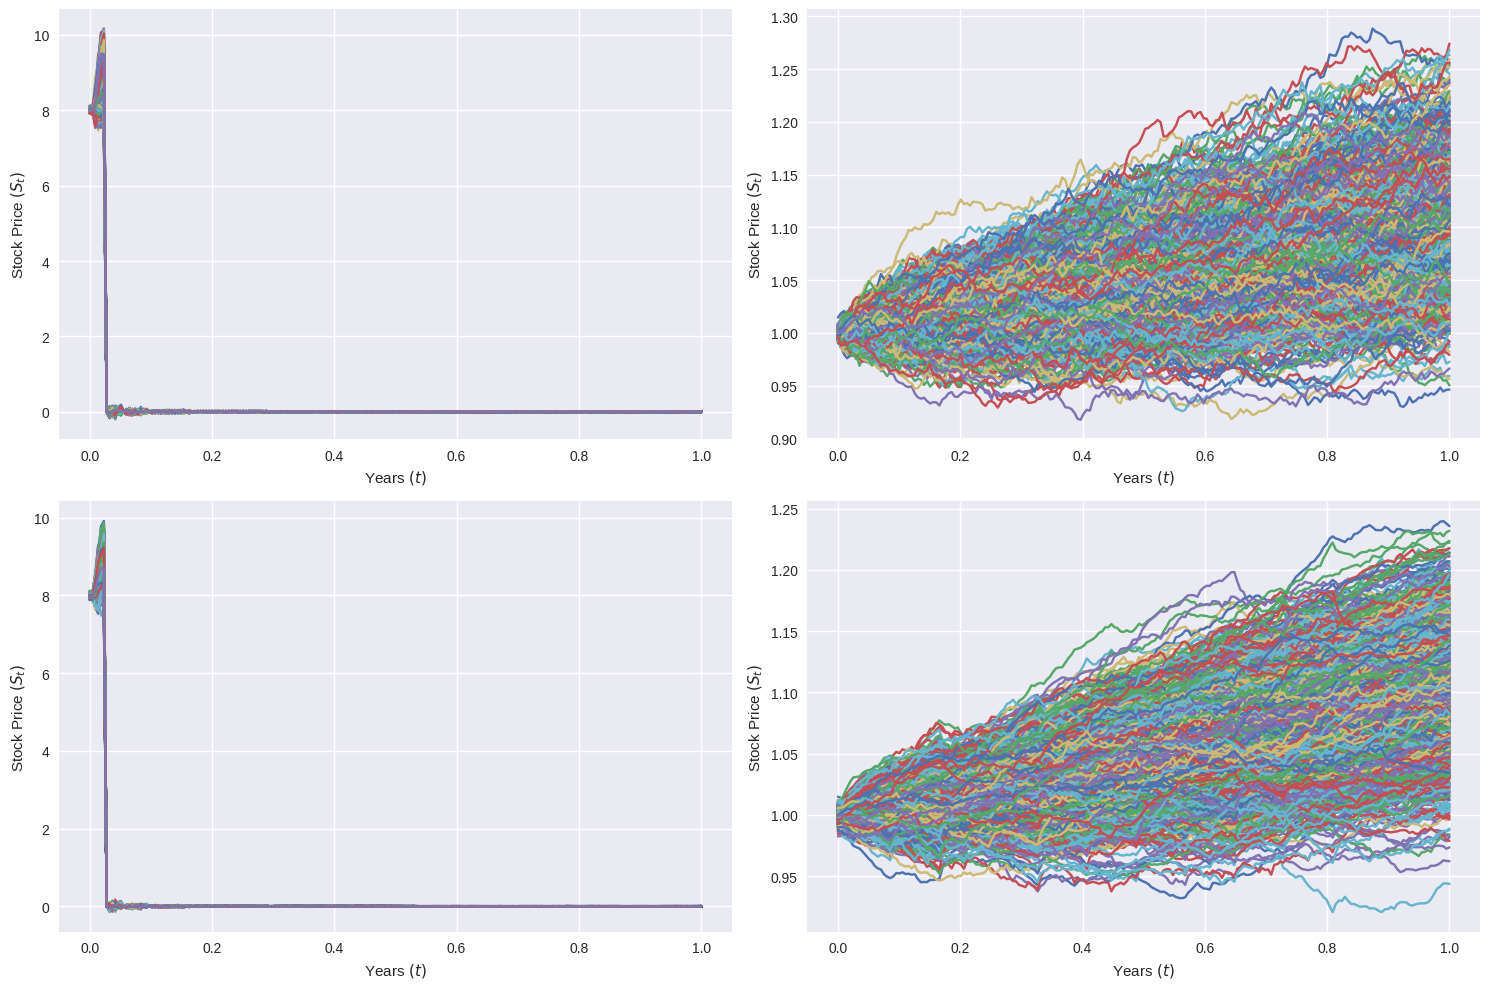

In [108]:
prediction_length = 1
n = 200
EXP_NAME = 'exp18-1'
DATASET = 'db2'

gbm_path = f'../results/{EXP_NAME}/{DATASET}/generation_log-0/'
data_path = gbm_path
real = np.load(data_path + 'real_samples.npy').T
synth = np.load(data_path + 'synth_samples.npy').T
print(real.shape, synth.shape)

fig, axs = plt.subplots(2, 2, figsize=(15, 10))

plot_gbm(axs[0, 0], real, real.shape[0], real.shape[1], 1/real.shape[0])
plot_gbm(axs[1, 0], synth, synth.shape[0], synth.shape[1], 1/synth.shape[0])

coeffs_real = restore_coeffs(real, coeffs_shapes[DATASET])
restored_real = wavelet_inverse_transform(coeffs_real, DATASET)
plot_gbm(axs[0, 1], restored_real, restored_real.shape[0], restored_real.shape[1], 1/restored_real.shape[0])
coeffs_syn = restore_coeffs(synth, coeffs_shapes[DATASET])
restored_synth = wavelet_inverse_transform(coeffs_syn, DATASET)
plot_gbm(axs[1, 1], restored_synth, restored_synth.shape[0], restored_synth.shape[1], 1/restored_synth.shape[0])

plt.tight_layout()
# plt.show()
 
gt_gbm = extract_targets_from_jsonl(f"../data/{EXP_NAME}/gbm-gbm-0.jsonl")
real_params = estimate_parameters(gt_gbm, 1/n, ret_distribution=True)
synth_params = estimate_parameters(restored_synth, 1/n, ret_distribution=True)
 
# Create a new figure for the KDE plots of sigma
sns.kdeplot(synth_params[0], label='Synth sigma', fill=True, ax=sigma_axes[0, 0])
sns.kdeplot(real_params[0], label='Real(sampled) sigma', fill=True, ax=sigma_axes[0, 0])
sigma_axes[0, 0].axvline(gt_sigma, color='r', label='Ground truth sigma', linestyle='dashed', linewidth=1)
sigma_axes[0, 0].set_title(f'KDE of Sigma {DATASET}')
sigma_axes[0, 0].set_xlabel('Sigma')
sigma_axes[0, 0].set_ylabel('Density')
sigma_axes[0, 0].set_xlim(0, 0.15)
sigma_axes[0, 0].legend()

# Create a new figure for the KDE plots of mu
sns.kdeplot(synth_params[1], label='Synth mu', fill=True, ax=mu_axes[0, 0])
sns.kdeplot(real_params[1], label='Real(sampled) mu', fill=True, ax=mu_axes[0, 0])
mu_axes[0, 0].axvline(gt_mu, color='r', label='Ground truth mu', linestyle='dashed', linewidth=1)
mu_axes[0, 0].set_title(f'KDE of Mu {DATASET}')
mu_axes[0, 0].set_xlabel('Mu')
mu_axes[0, 0].set_ylabel('Density')
mu_axes[0, 0].set_xlim(-0.3, 0.3)
mu_axes[0, 0].legend()






(241, 1000) (241, 1000)


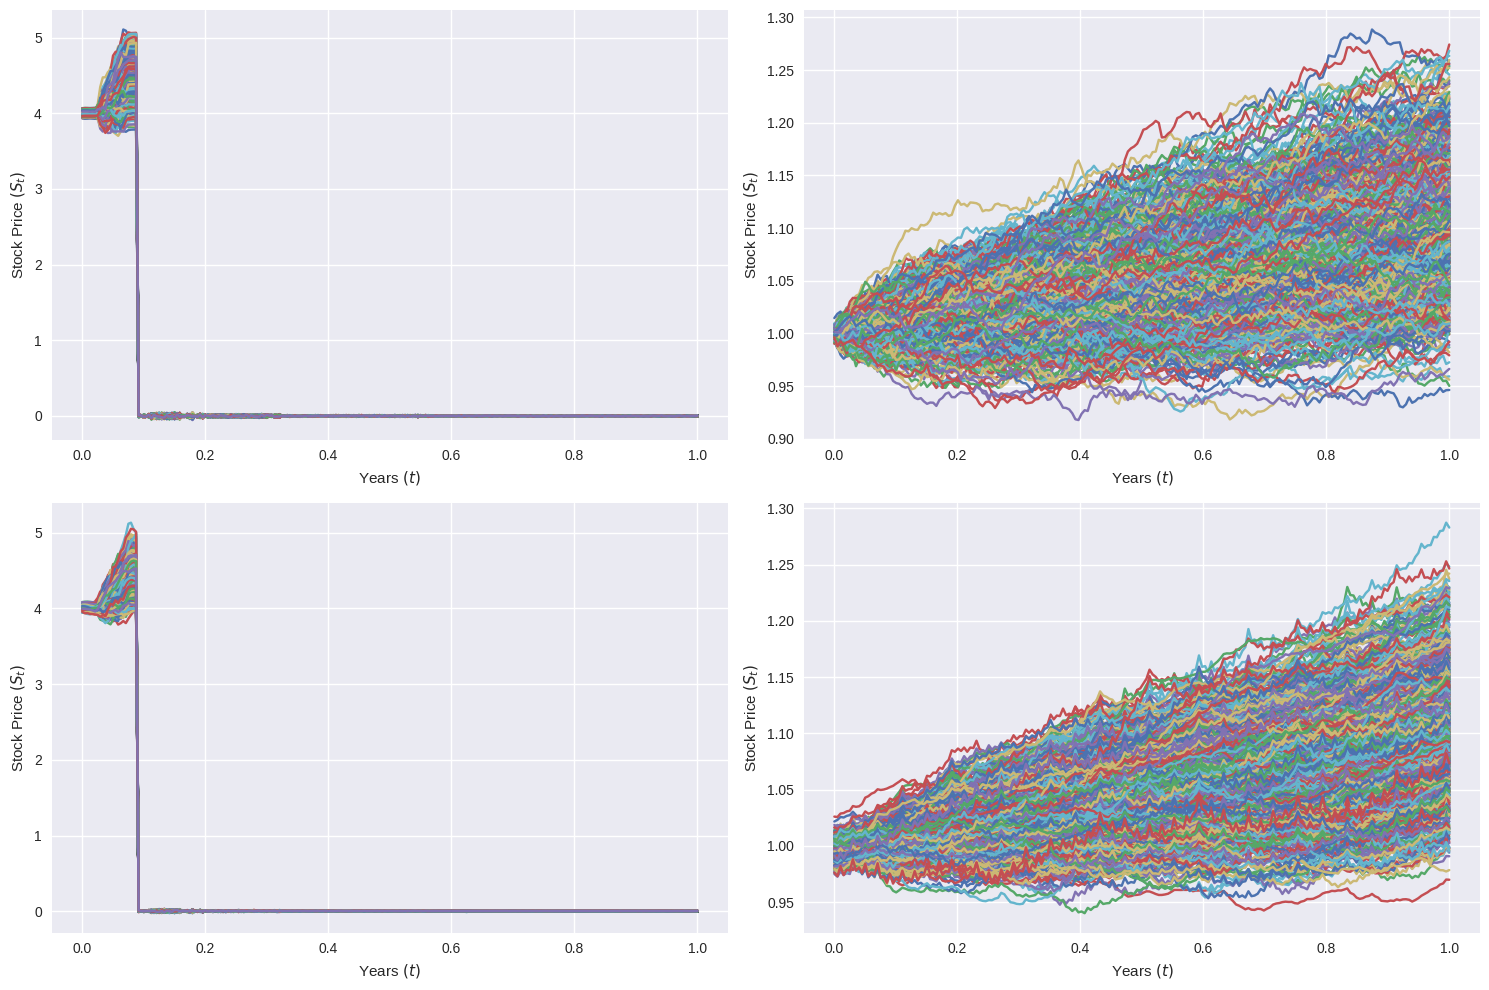

In [109]:
prediction_length = 1
n = 200
EXP_NAME = 'exp18-1'
DATASET = 'coif2'

gbm_path = f'../results/{EXP_NAME}/{DATASET}/generation_log-0/'
data_path = gbm_path
real = np.load(data_path + 'real_samples.npy').T
synth = np.load(data_path + 'synth_samples.npy').T
print(real.shape, synth.shape)


fig, axs = plt.subplots(2, 2, figsize=(15, 10))

plot_gbm(axs[0, 0], real, real.shape[0], real.shape[1], 1/real.shape[0])
plot_gbm(axs[1, 0], synth, synth.shape[0], synth.shape[1], 1/synth.shape[0])

coeffs_real = restore_coeffs(real, coeffs_shapes[DATASET])
restored_real = wavelet_inverse_transform(coeffs_real, DATASET)
plot_gbm(axs[0, 1], restored_real, restored_real.shape[0], restored_real.shape[1], 1/restored_real.shape[0])
coeffs_syn = restore_coeffs(synth, coeffs_shapes[DATASET])
restored_synth = wavelet_inverse_transform(coeffs_syn, DATASET)
plot_gbm(axs[1, 1], restored_synth, restored_synth.shape[0], restored_synth.shape[1], 1/restored_synth.shape[0])

plt.tight_layout()
# plt.show()
 
gt_gbm = extract_targets_from_jsonl(f"../data/{EXP_NAME}/gbm-gbm-0.jsonl")
real_params = estimate_parameters(gt_gbm, 1/n, ret_distribution=True)
synth_params = estimate_parameters(restored_synth, 1/n, ret_distribution=True)
 
# Create a new figure for the KDE plots of sigma
sns.kdeplot(synth_params[0], label='Synth sigma', fill=True, ax=sigma_axes[0, 1])
sns.kdeplot(real_params[0], label='Real(sampled) sigma', fill=True, ax=sigma_axes[0, 1])
sigma_axes[0, 1].axvline(gt_sigma, color='r', label='Ground truth sigma', linestyle='dashed', linewidth=1)
sigma_axes[0, 1].set_title(f'KDE of Sigma {DATASET}')
sigma_axes[0, 1].set_xlabel('Sigma')
sigma_axes[0, 1].set_ylabel('Density')
sigma_axes[0, 1].set_xlim(0, 0.15)
sigma_axes[0, 1].legend()

# Create a new figure for the KDE plots of mu
sns.kdeplot(synth_params[1], label='Synth mu', fill=True, ax=mu_axes[0, 1])
sns.kdeplot(real_params[1], label='Real(sampled) mu', fill=True, ax=mu_axes[0, 1])
mu_axes[0, 1].axvline(gt_mu, color='r', label='Ground truth mu', linestyle='dashed', linewidth=1)
mu_axes[0, 1].set_title(f'KDE of Mu {DATASET}')
mu_axes[0, 1].set_xlabel('Mu')
mu_axes[0, 1].set_ylabel('Density')
mu_axes[0, 1].set_xlim(-0.3, 0.3)
mu_axes[0, 1].legend()
# 






(203, 1000) (203, 1000)


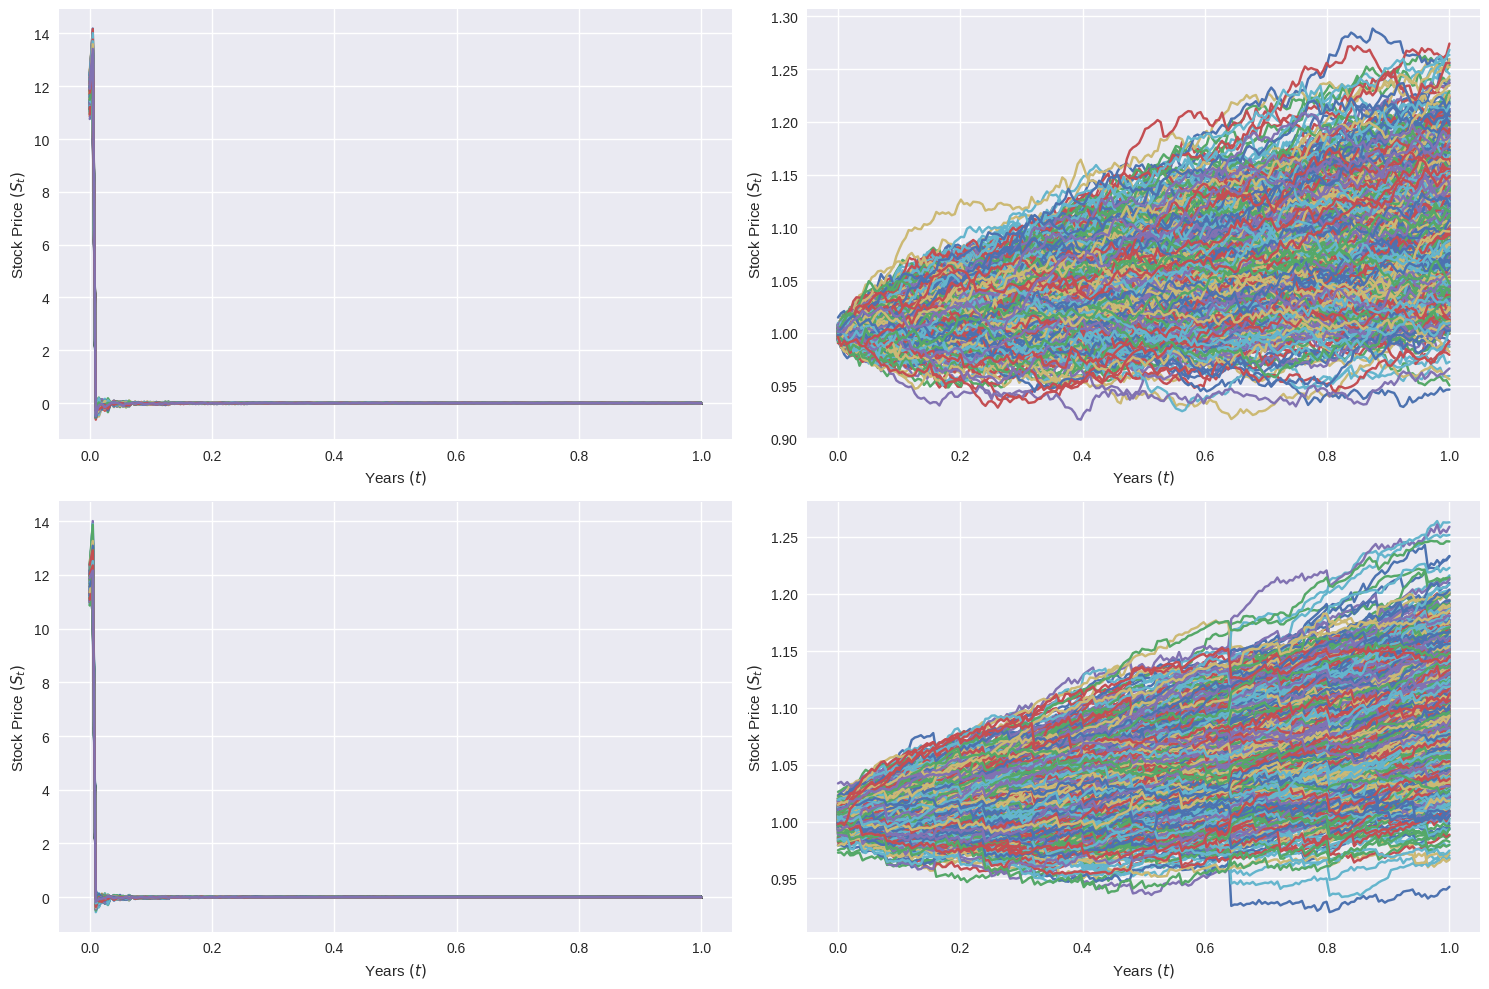

In [110]:
prediction_length = 1
n = 200
EXP_NAME = 'exp18-1'
DATASET = 'haar'

gbm_path = f'../results/{EXP_NAME}/{DATASET}/generation_log-0/'
data_path = gbm_path
real = np.load(data_path + 'real_samples.npy').T
synth = np.load(data_path + 'synth_samples.npy').T
print(real.shape, synth.shape)


fig, axs = plt.subplots(2, 2, figsize=(15, 10))

plot_gbm(axs[0, 0], real, real.shape[0], real.shape[1], 1/real.shape[0])
plot_gbm(axs[1, 0], synth, synth.shape[0], synth.shape[1], 1/synth.shape[0])

coeffs_real = restore_coeffs(real, coeffs_shapes[DATASET])
restored_real = wavelet_inverse_transform(coeffs_real, DATASET)
plot_gbm(axs[0, 1], restored_real, restored_real.shape[0], restored_real.shape[1], 1/restored_real.shape[0])
coeffs_syn = restore_coeffs(synth, coeffs_shapes[DATASET])
restored_synth = wavelet_inverse_transform(coeffs_syn, DATASET)
plot_gbm(axs[1, 1], restored_synth, restored_synth.shape[0], restored_synth.shape[1], 1/restored_synth.shape[0])

plt.tight_layout()
# plt.show()
 
gt_gbm = extract_targets_from_jsonl(f"../data/{EXP_NAME}/gbm-gbm-0.jsonl")
real_params = estimate_parameters(gt_gbm, 1/n, ret_distribution=True)
synth_params = estimate_parameters(restored_synth, 1/n, ret_distribution=True)
 
# Create a new figure for the KDE plots of sigma
sns.kdeplot(synth_params[0], label='Synth sigma', fill=True, ax=sigma_axes[0, 2])
sns.kdeplot(real_params[0], label='Real(sampled) sigma', fill=True, ax=sigma_axes[0, 2])
sigma_axes[0, 2].axvline(gt_sigma, color='r', label='Ground truth sigma', linestyle='dashed', linewidth=1)
sigma_axes[0, 2].set_title(f'KDE of Sigma {DATASET}')
sigma_axes[0, 2].set_xlabel('Sigma')
sigma_axes[0, 2].set_ylabel('Density')
sigma_axes[0, 2].set_xlim(0, 0.15)
sigma_axes[0, 2].legend()

# Create a new figure for the KDE plots of mu
sns.kdeplot(synth_params[1], label='Synth mu', fill=True, ax=mu_axes[0, 2])
sns.kdeplot(real_params[1], label='Real(sampled) mu', fill=True, ax=mu_axes[0, 2])
mu_axes[0, 2].axvline(gt_mu, color='r', label='Ground truth mu', linestyle='dashed', linewidth=1)
mu_axes[0, 2].set_title(f'KDE of Mu {DATASET}')
mu_axes[0, 2].set_xlabel('Mu')
mu_axes[0, 2].set_ylabel('Density')
mu_axes[0, 2].set_xlim(-0.3, 0.3)
mu_axes[0, 2].legend()




(227, 1000) (227, 1000)


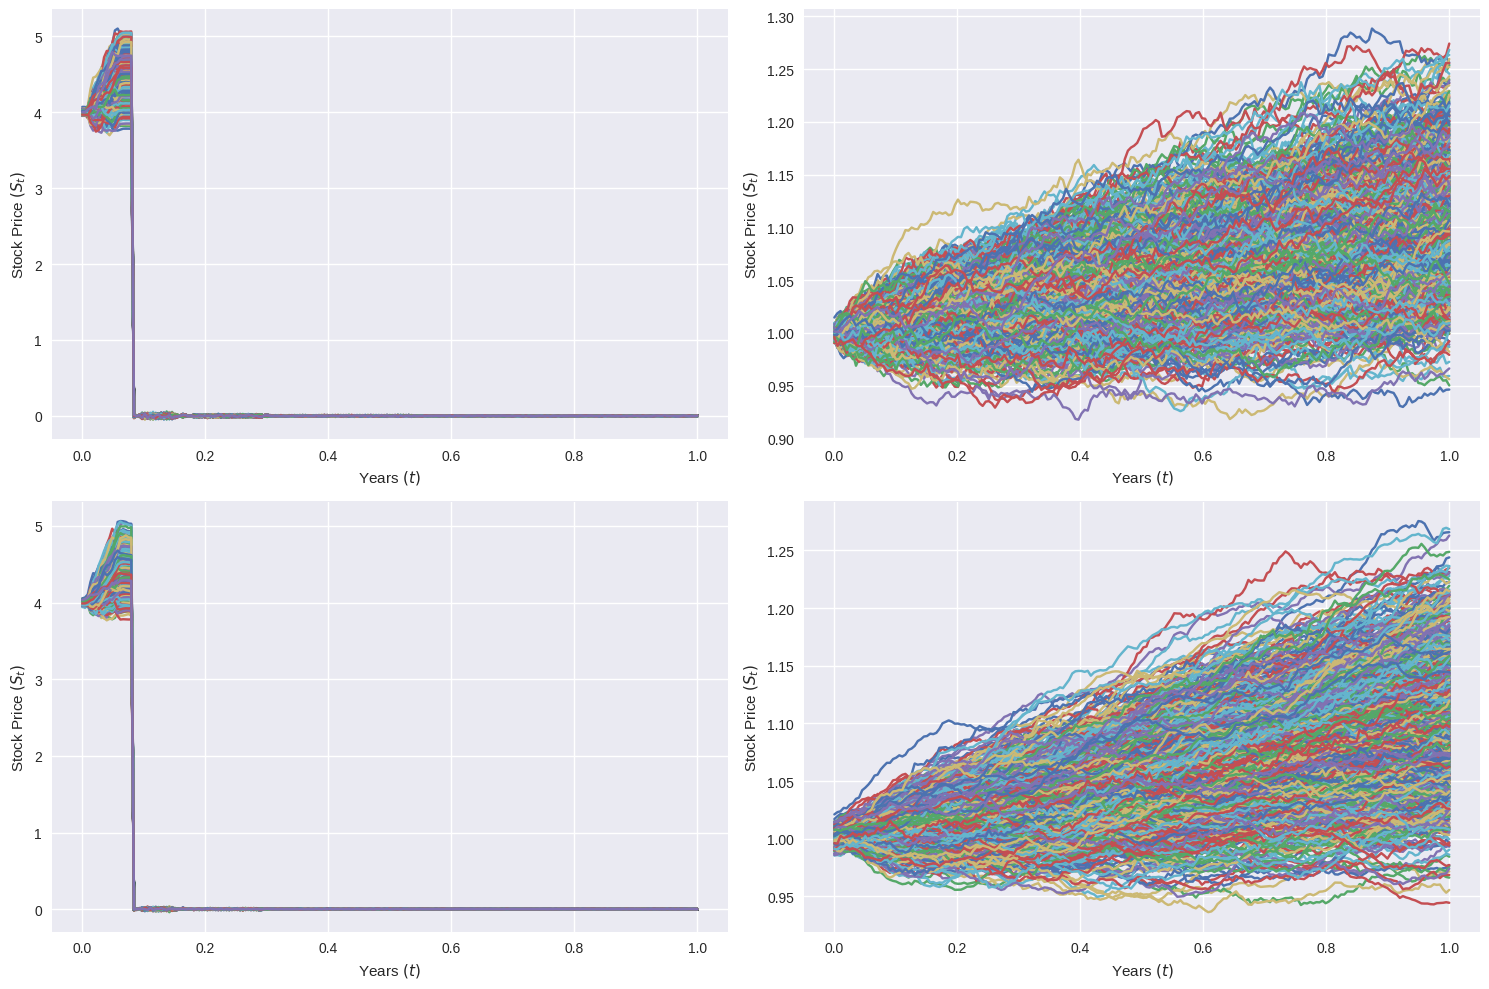

In [111]:
prediction_length = 1
n = 200
EXP_NAME = 'exp18-1'
DATASET = 'sym4'

gbm_path = f'../results/{EXP_NAME}/{DATASET}/generation_log-0/'
data_path = gbm_path
real = np.load(data_path + 'real_samples.npy').T
synth = np.load(data_path + 'synth_samples.npy').T
print(real.shape, synth.shape)


fig, axs = plt.subplots(2, 2, figsize=(15, 10))

plot_gbm(axs[0, 0], real, real.shape[0], real.shape[1], 1/real.shape[0])
plot_gbm(axs[1, 0], synth, synth.shape[0], synth.shape[1], 1/synth.shape[0])

coeffs_real = restore_coeffs(real, coeffs_shapes[DATASET])
restored_real = wavelet_inverse_transform(coeffs_real, DATASET)
plot_gbm(axs[0, 1], restored_real, restored_real.shape[0], restored_real.shape[1], 1/restored_real.shape[0])
coeffs_syn = restore_coeffs(synth, coeffs_shapes[DATASET])
restored_synth = wavelet_inverse_transform(coeffs_syn, DATASET)
plot_gbm(axs[1, 1], restored_synth, restored_synth.shape[0], restored_synth.shape[1], 1/restored_synth.shape[0])

plt.tight_layout()
# plt.show()
 
gt_gbm = extract_targets_from_jsonl(f"../data/{EXP_NAME}/gbm-gbm-0.jsonl")
real_params = estimate_parameters(gt_gbm, 1/n, ret_distribution=True)
synth_params = estimate_parameters(restored_synth, 1/n, ret_distribution=True)
 
# Create a new figure for the KDE plots of sigma
sns.kdeplot(synth_params[0], label='Synth sigma', fill=True, ax=sigma_axes[1, 0])
sns.kdeplot(real_params[0], label='Real(sampled) sigma', fill=True, ax=sigma_axes[1, 0])
sigma_axes[1, 0].axvline(gt_sigma, color='r', label='Ground truth sigma', linestyle='dashed', linewidth=1)
sigma_axes[1, 0].set_title(f'KDE of Sigma {DATASET}')
sigma_axes[1, 0].set_xlabel('Sigma')
sigma_axes[1, 0].set_ylabel('Density')
sigma_axes[1, 0].set_xlim(0, 0.15)
sigma_axes[1, 0].legend()

# Create a new figure for the KDE plots of mu
sns.kdeplot(synth_params[1], label='Synth mu', fill=True, ax=mu_axes[1, 0])
sns.kdeplot(real_params[1], label='Real(sampled) mu', fill=True, ax=mu_axes[1, 0])
mu_axes[1, 0].axvline(gt_mu, color='r', label='Ground truth mu', linestyle='dashed', linewidth=1)
mu_axes[1, 0].set_title(f'KDE of Mu {DATASET}')
mu_axes[1, 0].set_xlabel('Mu')
mu_axes[1, 0].set_ylabel('Density')
mu_axes[1, 0].set_xlim(-0.3, 0.3)
mu_axes[1, 0].legend()
# 






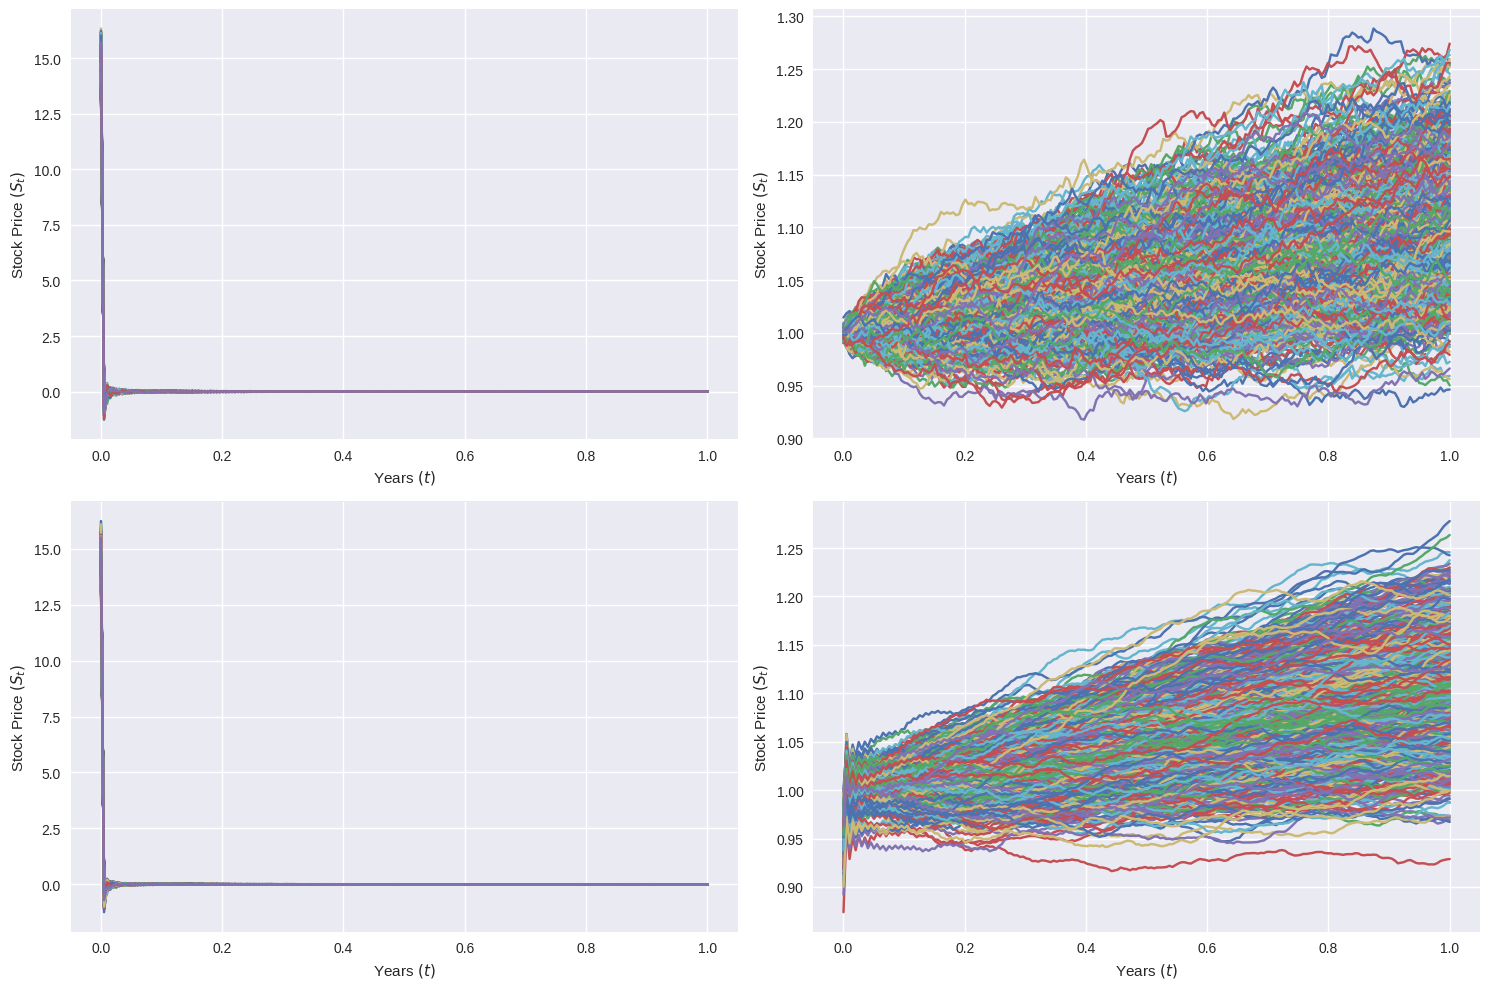

In [112]:
from scipy.fftpack import idct, dct
prediction_length = 1
n = 200
EXP_NAME = 'exp18-1'
DATASET = 'cos'

gbm_path = f'../results/{EXP_NAME}/{DATASET}/generation_log-0/'
data_path = gbm_path
real = np.load(data_path + 'real_samples.npy').T
synth = np.load(data_path + 'synth_samples.npy').T

fig, axs = plt.subplots(2, 2, figsize=(15, 10))

plot_gbm(axs[0, 0], real, real.shape[0], real.shape[1], 1/real.shape[0])
plot_gbm(axs[1, 0], synth, synth.shape[0], synth.shape[1], 1/synth.shape[0])

restored_real = idct(real, axis=0, norm='ortho')
plot_gbm(axs[0, 1], restored_real, restored_real.shape[0], restored_real.shape[1], 1/restored_real.shape[0])

restored_synth = idct(synth, axis=0, norm='ortho')
plot_gbm(axs[1, 1], restored_synth, restored_synth.shape[0], restored_synth.shape[1], 1/restored_synth.shape[0])

plt.tight_layout()
# plt.show()
# 
# 
gt_gbm = extract_targets_from_jsonl(f"../data/{EXP_NAME}/gbm-gbm-0.jsonl")
real_params = estimate_parameters(gt_gbm, 1/n, ret_distribution=True)
synth_params = estimate_parameters(restored_synth, 1/n, ret_distribution=True)

# Create a new figure for the KDE plots of sigma
sns.kdeplot(synth_params[0], label='Synth sigma', fill=True, ax=sigma_axes[1, 1])
sns.kdeplot(real_params[0], label='Real(sampled) sigma', fill=True, ax=sigma_axes[1, 1])
sigma_axes[1, 1].axvline(gt_sigma, color='r', label='Ground truth sigma', linestyle='dashed', linewidth=1)
sigma_axes[1, 1].set_title(f'KDE of Sigma {DATASET}')
sigma_axes[1, 1].set_xlabel('Sigma')
sigma_axes[1, 1].set_ylabel('Density')
sigma_axes[1, 1].set_xlim(0, 0.15)
sigma_axes[1, 1].legend()

# Create a new figure for the KDE plots of mu
sns.kdeplot(synth_params[1], label='Synth mu', fill=True, ax=mu_axes[1, 1])
sns.kdeplot(real_params[1], label='Real(sampled) mu', fill=True, ax=mu_axes[1, 1])
mu_axes[1, 1].axvline(gt_mu, color='r', label='Ground truth mu', linestyle='dashed', linewidth=1)
mu_axes[1, 1].set_title(f'KDE of Mu {DATASET}')
mu_axes[1, 1].set_xlabel('Mu')
mu_axes[1, 1].set_ylabel('Density')
mu_axes[1, 1].set_xlim(-0.3, 0.3)
mu_axes[1, 1].legend()

In [113]:
def plot_gbm(St, n, M, dt, xlabel="Years $(t)$", ylabel="Stock Price $(S_t)$"):
    time = np.linspace(0, n * dt, St.shape[0])
    tt = np.full(shape=(M, St.shape[0]), fill_value=time).T
    plt.plot(tt, St)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.show()

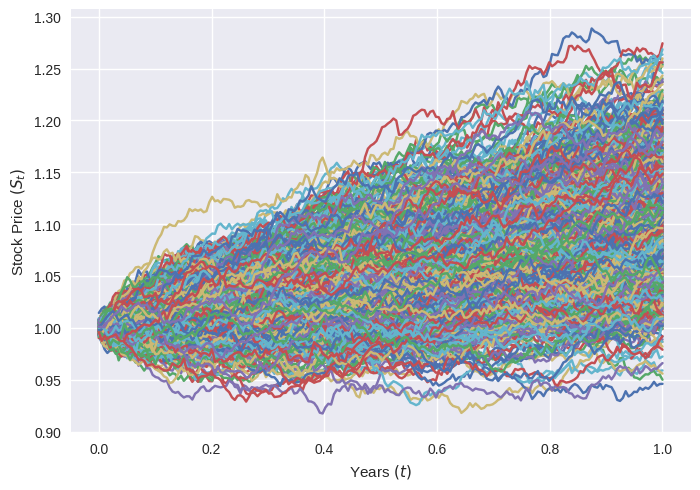

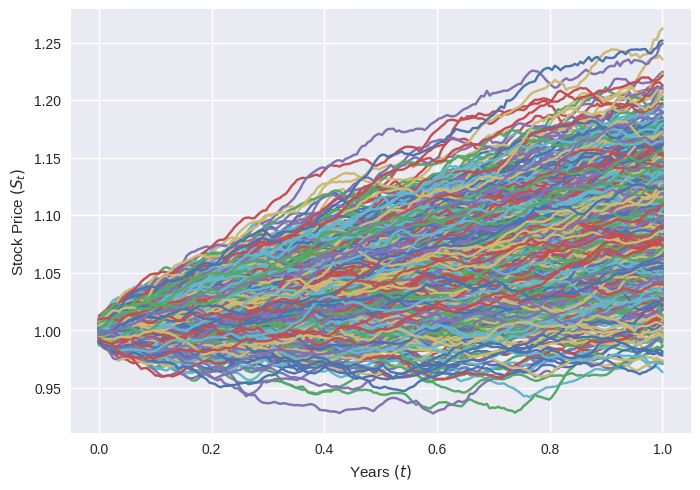

In [114]:
from scipy.fftpack import idct, dct
prediction_length = 1
n = 200
EXP_NAME = 'exp18-1'
DATASET = 'gbm'

gbm_path = f'../results/{EXP_NAME}/{DATASET}/generation_log-0/'
data_path = gbm_path
real = np.load(data_path + 'real_samples.npy').T
synth = np.load(data_path + 'synth_samples.npy').T

plot_gbm(real, real.shape[0], real.shape[1], 1/real.shape[0])
plot_gbm(synth, synth.shape[0], synth.shape[1], 1/synth.shape[0])





gt_gbm = extract_targets_from_jsonl(f"../data/{EXP_NAME}/gbm-gbm-0.jsonl")
real_params = estimate_parameters(gt_gbm, 1/n, ret_distribution=True)
synth_params = estimate_parameters(synth, 1/n, ret_distribution=True)

# Create a new figure for the KDE plots of sigma
sns.kdeplot(synth_params[0], label='Synth sigma', fill=True, ax=sigma_axes[1, 2])
sns.kdeplot(real_params[0], label='Real(sampled) sigma', fill=True, ax=sigma_axes[1, 2])
sigma_axes[1, 2].axvline(gt_sigma, color='r', label='Ground truth sigma', linestyle='dashed', linewidth=1)
sigma_axes[1, 2].set_title(f'KDE of Sigma {DATASET}')
sigma_axes[1, 2].set_xlabel('Sigma')
sigma_axes[1, 2].set_ylabel('Density')
sigma_axes[1, 2].set_xlim(0, 0.15)
sigma_axes[1, 2].legend()

# Create a new figure for the KDE plots of mu
sns.kdeplot(synth_params[1], label='Synth mu', fill=True, ax=mu_axes[1, 2])
sns.kdeplot(real_params[1], label='Real(sampled) mu', fill=True, ax=mu_axes[1, 2])
mu_axes[1, 2].axvline(gt_mu, color='r', label='Ground truth mu', linestyle='dashed', linewidth=1)
mu_axes[1, 2].set_title(f'KDE of Mu {DATASET}')
mu_axes[1, 2].set_xlabel('Mu')
mu_axes[1, 2].set_ylabel('Density')
mu_axes[1, 2].set_xlim(-0.3, 0.3)
mu_axes[1, 2].legend()

In [115]:

sigma_figure.savefig('exp18_plots/sigma_kde.png')
mu_figure.savefig('exp18_plots/mu_kde.png')


In [116]:
plt.show()